<a href="https://colab.research.google.com/github/jyotz02/Learning/blob/master/Loan%20Prediction/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [0]:
test=pd.read_csv("/content/drive/My Drive/dse/loan_prediction/test_lAUu6dG.csv")
train=pd.read_csv("/content/drive/My Drive/dse/loan_prediction/train_ctrUa4K.csv")

In [0]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
train.shape

(614, 13)

In [0]:
test.shape

(367, 12)

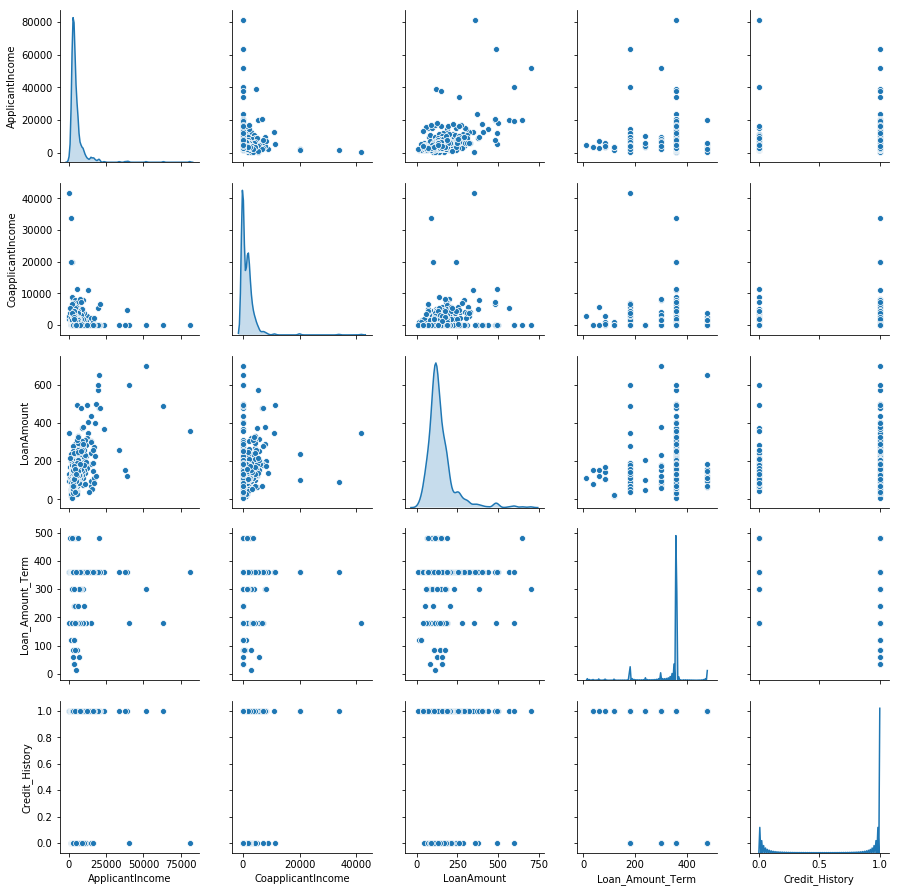

In [0]:
sns.pairplot(train,diag_kind='kde')

## Univariate Analysis

<Figure size 432x288 with 0 Axes>

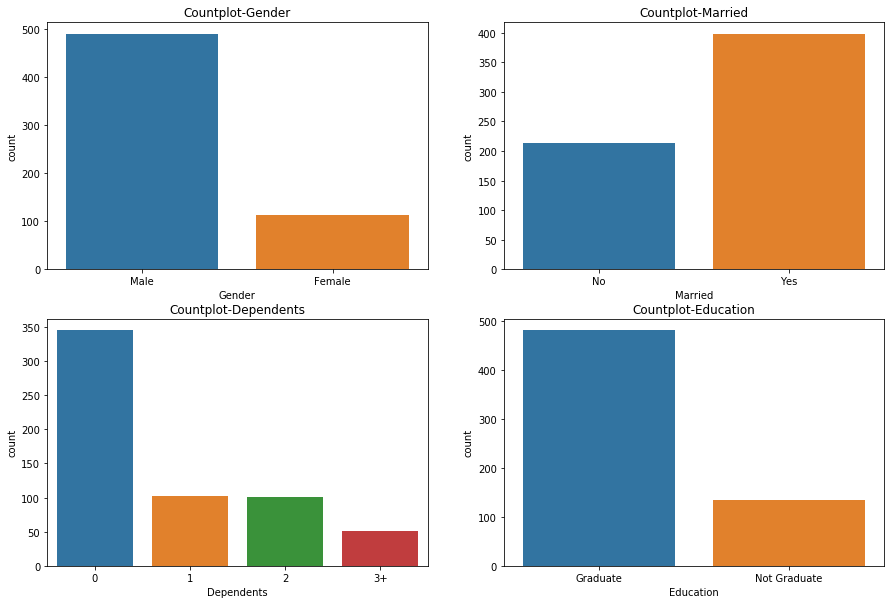

In [0]:
plt.figure(1)

plt.figure(figsize=[15,10])

plt.subplot(221)
sns.countplot(x="Gender",data=train)
plt.title("Countplot-Gender")

plt.subplot(222)
sns.countplot(x="Married",data=train)
plt.title("Countplot-Married")

plt.subplot(223)
sns.countplot(x="Dependents",data=train)
plt.title("Countplot-Dependents")

plt.subplot(224)
sns.countplot(x="Education",data=train)
plt.title("Countplot-Education")

plt.show()

<Figure size 432x288 with 0 Axes>

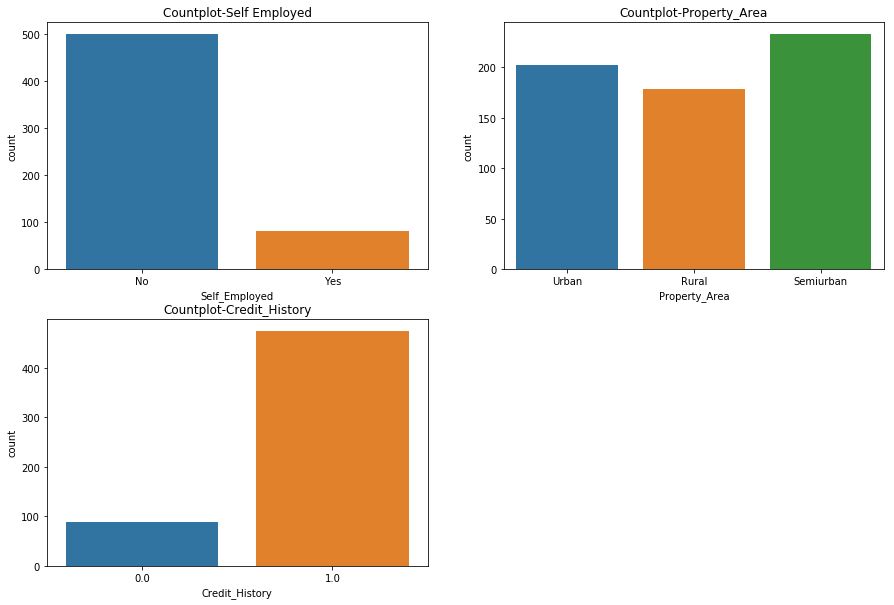

In [0]:
plt.figure(1)

plt.figure(figsize=[15,10])

plt.subplot(221)
sns.countplot(x="Self_Employed",data=train)
plt.title("Countplot-Self Employed")

plt.subplot(222)
sns.countplot(x="Property_Area",data=train)
plt.title("Countplot-Property_Area")

plt.subplot(223)
sns.countplot(x="Credit_History",data=train)
plt.title("Countplot-Credit_History")


plt.show()    

# Observation of Independent Categorical var

1. More males in comparision to females--- 80% males n 18% females
2. Married people count is more in comparision to Bachelors.-- 65% applied for loan are married whereas 34% are unmarried.
3. In dependents, count of 0 is more -- 57% people have no dependents
4. Level of education is higher -- 78% peoples are grad
5. 14% are Self employed whereas 85% people r not
6. 84% people have 1 credit score n 16% people have 0s.
7. 38 SemiUrban..33% Urban..29% rural

In [0]:
# ratio of males n females

train.Gender.value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [0]:
train.Married.value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [0]:
train.Dependents.value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [0]:
train.Education.value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

## Univariate Numeric fields

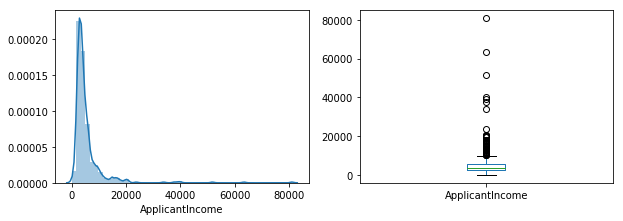

In [0]:
plt.figure(1,figsize=[10,7])

plt.subplot(221)
sns.distplot(train.ApplicantIncome)


plt.subplot(222)
train["ApplicantIncome"].plot.box(figsize=[10,7])
plt.show()

In [0]:
np.log(train.ApplicantIncome).describe()

count    614.000000
mean       8.341213
std        0.645263
min        5.010635
25%        7.964677
50%        8.246040
75%        8.664750
max       11.302204
Name: ApplicantIncome, dtype: float64

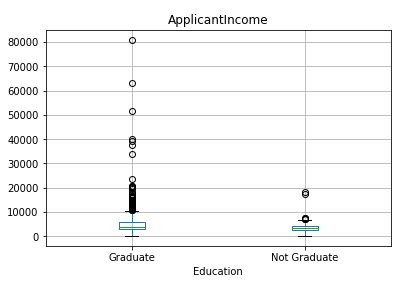

In [0]:
# Education 
#sns.boxplot(x='Education',y='ApplicantIncome',data=train)

train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle(" ")
plt.show()

#### Graduates are getting better salary

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


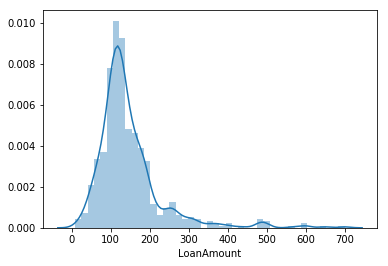

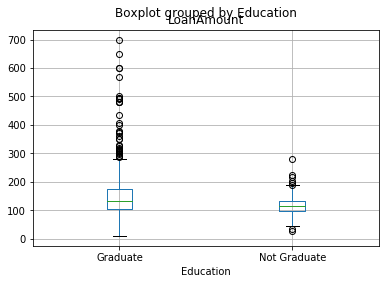

In [0]:
sns.distplot(train[pd.notnull(train.LoanAmount)]["LoanAmount"])
plt.show()

train.boxplot(column="LoanAmount",by="Education")

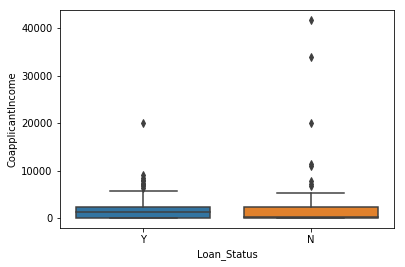

In [0]:
sns.boxplot("Loan_Status","CoapplicantIncome",data=train)

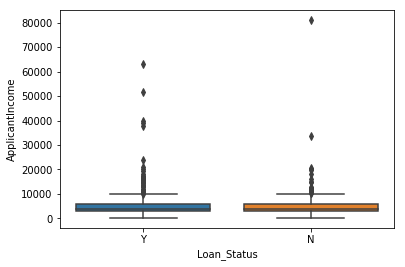

In [0]:
sns.boxplot("Loan_Status","ApplicantIncome",data=train)

In [0]:
train.CoapplicantIncome  .describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

## Bivariate Analysis

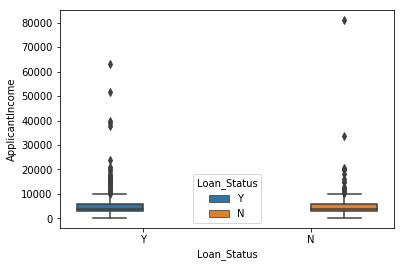

In [0]:
sns.boxplot(x='Loan_Status',y="ApplicantIncome",data=train,hue="Loan_Status")
plt.show()

### Good Acceptance for high income

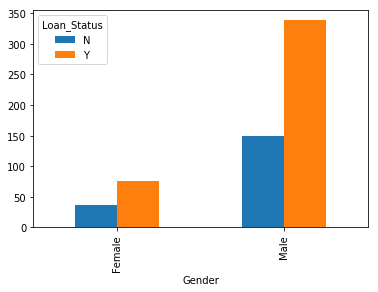

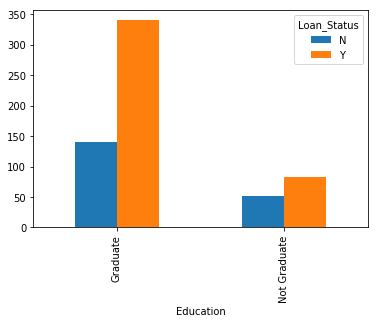

In [0]:
# Gender Vs Loan Status

gender=pd.crosstab(train.Gender,train.Loan_Status)
gender.plot(kind='bar')

edu=pd.crosstab(train.Education,train.Loan_Status)
edu.plot(kind='bar')

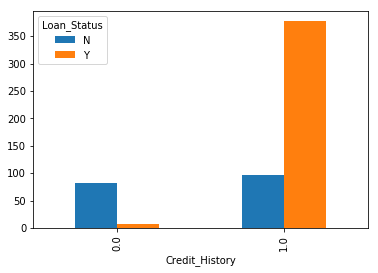

In [0]:
credit=pd.crosstab(train.Credit_History,train.Loan_Status)
credit.plot(kind='bar')

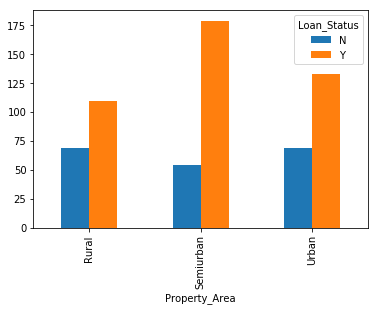

In [0]:
prop=pd.crosstab(train.Property_Area,train.Loan_Status)
prop.plot(kind='bar')

## Observation :
Males get more loan compared to females

More educated people get loan

High freq of people getting loan with credit history 1

Disbursal of loan more in SemiUrban than in Urban

In [0]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
# to rectify 3+ with 3
train.Dependents.replace(to_replace="3+",value=3,inplace=True)

In [0]:
train.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [0]:
# find the correlation and make heatmap

correls=train.corr()

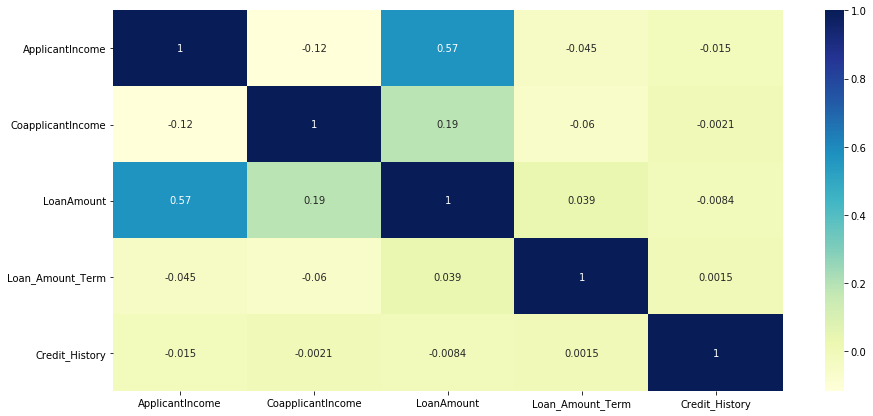

In [0]:
plt.figure(figsize=[15,7])
sns.heatmap(correls,cmap="YlGnBu",annot=True)

In [0]:
## Missing Values

In [0]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
train["Gender"].fillna(train.Gender.mode()[0],inplace=True)
train["Married"].fillna(train.Married.mode()[0],inplace=True)
train["Dependents"].fillna(train.Dependents.mode()[0],inplace=True)
train["Self_Employed"].fillna(train.Self_Employed.mode()[0],inplace=True)
train["Credit_History"].fillna(train.Credit_History.mode()[0],inplace=True)
train["Loan_Amount_Term"].fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [0]:
test["Gender"].fillna(test.Gender.mode()[0],inplace=True)
test["Married"].fillna(test.Married.mode()[0],inplace=True)
test["Dependents"].fillna(test.Dependents.mode()[0],inplace=True)
test["Self_Employed"].fillna(test.Self_Employed.mode()[0],inplace=True)
test["Credit_History"].fillna(test.Credit_History.mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test.Loan_Amount_Term.mode()[0],inplace=True)

In [0]:
train.LoanAmount.fillna(128,inplace=True)

In [0]:
test.LoanAmount.fillna(125,inplace=True)

In [0]:
test.LoanAmount.describe()

count    367.000000
mean     135.980926
std       60.959739
min       28.000000
25%      101.000000
50%      125.000000
75%      157.500000
max      550.000000
Name: LoanAmount, dtype: float64

## Feature Engg

In [0]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [0]:
def loan_stat(x):
  if(x=='Y'):
    return(1)
  else:
    return(0)

In [0]:
train['Loan_Status']=train.Loan_Status.apply(loan_stat)

In [0]:
train.Loan_ID.value_counts()

LP002139    1
LP002341    1
LP001265    1
LP002409    1
LP001900    1
LP002940    1
LP001008    1
LP001732    1
LP002478    1
LP001882    1
LP001243    1
LP001877    1
LP001872    1
LP001370    1
LP002777    1
LP001580    1
LP001255    1
LP002103    1
LP002377    1
LP001087    1
LP001520    1
LP002537    1
LP001205    1
LP001692    1
LP001565    1
LP001726    1
LP001263    1
LP001907    1
LP001868    1
LP001030    1
           ..
LP002337    1
LP002689    1
LP001345    1
LP001002    1
LP001990    1
LP002582    1
LP002792    1
LP001758    1
LP001908    1
LP002180    1
LP001658    1
LP002284    1
LP001888    1
LP002541    1
LP002522    1
LP002544    1
LP002622    1
LP002272    1
LP002467    1
LP002087    1
LP001279    1
LP002732    1
LP002255    1
LP002205    1
LP001865    1
LP001207    1
LP001316    1
LP002347    1
LP002263    1
LP001334    1
Name: Loan_ID, Length: 614, dtype: int64

## Create a new colm EMI

In [0]:
train["EMI"]=round((train.LoanAmount*1000)/train.Loan_Amount_Term,2)

In [0]:
test["EMI"]=round((test.LoanAmount*1000)/test.Loan_Amount_Term,2)

<Figure size 432x288 with 0 Axes>

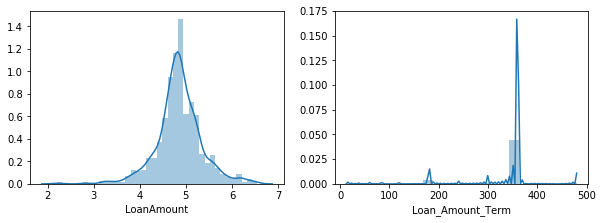

In [0]:
plt.figure(1)

plt.figure(figsize=[10,7])
plt.subplot(221)
sns.distplot(np.log(train.LoanAmount))

plt.subplot(222)
sns.distplot(train.Loan_Amount_Term)
plt.show()

In [0]:
train["LoanAmount_Log"]=np.log(train.LoanAmount)

In [0]:
test["LoanAmount_Log"]=np.log(test.LoanAmount)

In [0]:
train["EMI_log"]=np.log(train.EMI)

In [0]:
test["EMI_log"]=np.log(test.EMI)

In [0]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,LoanAmount_Log,EMI_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,355.56,4.852030,5.873694,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,355.56,4.852030,5.873694,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,183.33,4.189655,5.211288,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,333.33,4.787492,5.809133,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,391.67,4.948760,5.970420,6000.0,8.699515


In [0]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,EMI,LoanAmount_Log,EMI_log,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,305.56,4.700480,5.722146,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,350.00,4.836282,5.857933,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,577.78,5.337538,6.359193,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,277.78,4.605170,5.626829,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,216.67,4.356709,5.378375,3276


In [0]:
train.LoanAmount_Log.describe()

count    614.000000
mean       4.857250
std        0.495996
min        2.197225
25%        4.607658
50%        4.852030
75%        5.104426
max        6.551080
Name: LoanAmount_Log, dtype: float64

In [0]:
#Total income

train["Total_Income"]=train.ApplicantIncome+train.CoapplicantIncome

In [0]:
test["Total_Income"]=test.ApplicantIncome+test.CoapplicantIncome

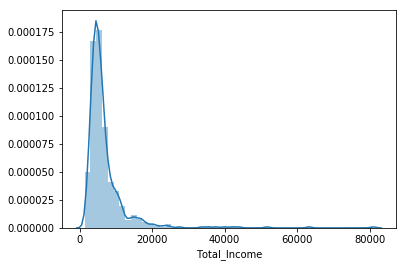

In [0]:
sns.distplot(train.Total_Income)

In [0]:
# log transformation
train["Total_Income_log"]=np.log(train.Total_Income)

In [0]:
test["Total_Income_log"]=np.log(test.Total_Income)

In [0]:
train.shape

(614, 18)

In [0]:
test.shape

(367, 17)

## MODEL BUILDING

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
newtrain.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'EMI',
       'LoanAmount_Log', 'EMI_log', 'Total_Income', 'Total_Income_log'],
      dtype='object')

In [0]:
newtrain=train.drop(["Loan_ID","Loan_Status","ApplicantIncome","CoapplicantIncome", "LoanAmount","EMI","Total_Income" ],axis=1)

In [0]:
newtest=test.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome", "LoanAmount","EMI","Total_Income" ],axis=1)

In [0]:
dummytrain=pd.get_dummies(newtrain)

In [0]:
dummytrain.shape

(614, 20)

In [0]:
dummytest=pd.get_dummies(newtest)

In [0]:
dummytest.shape

(367, 20)

In [0]:
scaled_train=pd.DataFrame(sc.fit_transform(dummytrain),columns=dummytrain.columns)

In [0]:
scaled_test=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf=RandomForestClassifier()

In [0]:
x=scaled_train
y=train.Loan_Status

In [0]:
pred2=rf.fit(x, y).predict(scaled_test)  

## Accuracy Score:

Using Random Forest model, getting accuracy of 0.7708333333333334.

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree=DecisionTreeClassifier()

In [0]:
pred_tree=dtree.fit(scaled_train,train.Loan_Status).predict(scaled_test)  

## Accuracy Score:

Using Decision Tree, getting accuracy score of 0.6388888889

In [0]:
def revloanstat(x):
  if(x==1):
    return("Y")
  else:
    return("N")

In [0]:
predlist=[]
for i in range(len(pred2)):
  if(pred2[i]==1):
    predlist.append("Y")
  else:
    predlist.append("N")

In [0]:
predlist

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [0]:
solution = pd.DataFrame({"Loan_ID":test.Loan_ID, "Loan_Status":predlist})

In [0]:
from google.colab import files
solution.to_csv("loanPredictionRandom.csv", index=False)
files.download("loanPredictionRandom.csv")